In [1]:
##importing Basic libraries
import pandas as pd
import pickle
from pandas import DataFrame, Series
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import numpy as np
import seaborn as sns
from sklearn import linear_model, naive_bayes
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error,r2_score
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [78]:
df3 = pd.read_csv("../Data/2025.csv",low_memory=False)

In [89]:
df3 = df3.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [90]:
#Create a new dataframe with only the columns we want for Analysis
dft = df3[['Pitcher','PitcherTeam','TaggedPitchType','PitchCall','PlayResult','RelSpeed','SpinRate','RelHeight','RelSide','Extension','InducedVertBreak', 'HorzBreak','PlateLocHeight','PlateLocSide']]

In [91]:
#fastballs = 'Fastball', 'Sinker', 'TwoSeamFastBall', 'FourSeamFastBall', 'OneSeamFastBall'
dfb2 = dft[dft.TaggedPitchType.isin(['Fastball', 'Sinker', 'TwoSeamFastBall', 'FourSeamFastBall', 'OneSeamFastBall'])]
#sliders = 'Slider'
dsl2 = dft[dft.TaggedPitchType.isin(['Slider'])]
#curveballs = 'Curveball', 'KnuckleCurve'
dcb2 = dft[dft.TaggedPitchType.isin(['Curveball', 'KnuckleCurve'])]
#Changeups = 'Changeup', 'Splitter', 'Forkball', 'Screwball'
dch2 = dft[dft.TaggedPitchType.isin(['Changeup','Splitter', 'Forkball', 'Screwball'])]




In [92]:
#create a new column called ABS_Horizontal with the absolute value of HorzBreak  in dfb2
dfb2['ABS_Horizontal'] = abs(dfb2['HorzBreak'])
dsl2['ABS_Horizontal'] = abs(dsl2['HorzBreak'])
dcb2['ABS_Horizontal'] = abs(dcb2['HorzBreak'])
dch2['ABS_Horizontal'] = abs(dch2['HorzBreak'])
#create a new column called ABS_relside with the absolute value of RelSide in dfb2
dfb2['ABS_RelSide'] = abs(dfb2['RelSide'])
dsl2['ABS_RelSide'] = abs(dsl2['RelSide'])
dcb2['ABS_RelSide'] = abs(dcb2['RelSide'])
dch2['ABS_RelSide'] = abs(dch2['RelSide'])
#create a new column called differential break which is the absolute value of InducedVertBreak - ABS_Horizontal
dfb2['differential_break'] = abs(dfb2['InducedVertBreak'] - dfb2['ABS_Horizontal'])
dsl2['differential_break'] = abs(dsl2['InducedVertBreak'] - dsl2['ABS_Horizontal'])
dcb2['differential_break'] = abs(dcb2['InducedVertBreak'] - dcb2['ABS_Horizontal'])
dch2['differential_break'] = abs(dch2['InducedVertBreak'] - dch2['ABS_Horizontal'])


C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\3249499381.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\3249499381.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\3249499381.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [93]:
#delete all rows with nan values
dfb2 = dfb2.dropna()
dsl2 = dsl2.dropna()
dcb2 = dcb2.dropna()
dch2 = dch2.dropna()


In [94]:
#reset index    
dfb2 = dfb2.reset_index(drop=True)
dsl2 = dsl2.reset_index(drop=True)
dcb2 = dcb2.reset_index(drop=True)
dch2 = dch2.reset_index(drop=True)

In [95]:
dfb2.count()

Pitcher               172
PitcherTeam           172
TaggedPitchType       172
PitchCall             172
PlayResult            172
RelSpeed              172
SpinRate              172
RelHeight             172
RelSide               172
Extension             172
InducedVertBreak      172
HorzBreak             172
PlateLocHeight        172
PlateLocSide          172
ABS_Horizontal        172
ABS_RelSide           172
differential_break    172
dtype: int64

In [96]:
#PitchCall unique values
dft['PitchCall'].unique()

array(['Foul', 'StrikeSwinging', 'StrikeCalled', 'BallCalled',
       'HitByPitch', 'InPlay', nan, 'FoulTip'], dtype=object)

In [9]:
#change 'SwinginStrike', 'StriekSwinging' in PitchCall to 'StrikeSwinging'
dft['PitchCall'] = dft['PitchCall'].replace(['SwinginStrike', 'StriekSwinging'], 'StrikeSwinging')

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\2683645860.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
#new dataframe with only PitchCall StrikeSwinging, InPlay, FoulBall and call it df_Swing
df_Swing = dft[(dft['PitchCall'] == 'StrikeSwinging') | (dft['PitchCall'] == 'InPlay') | (dft['PitchCall'] == 'FoulBall')]

In [11]:
#create a dummy variable for PitchCall with StrikeSwinging = 1 and InPlay, FoulBall = 0
df_Swing['Whiff'] = df_Swing['PitchCall'].replace(['StrikeSwinging'], 1)
df_Swing['Whiff'] = df_Swing['PitchCall'].replace(['InPlay', 'FoulBall'], 0)

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\2116572367.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\2116572367.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
#replace strike swinging with 1 and inplay, foulball with 0
df_Swing['Whiff'] = df_Swing['Whiff'].replace(['StrikeSwinging'], 1)

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\2166355664.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\2166355664.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [13]:
#create a new column called ABS_Horizontal with the absolute value of HorzBreak
df_Swing['ABS_Horizontal'] = abs(df_Swing['HorzBreak'])
#create a new column called ABS_RelSide with the absolute value of RelSide
df_Swing['ABS_RelSide'] = abs(df_Swing['RelSide'])

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\1567009961.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\1567009961.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
#create a new column called differential break which is the absolute value of InducedVertBreak - ABS_Horizontal
df_Swing['differential_break'] = abs(df_Swing['InducedVertBreak'] - df_Swing['ABS_Horizontal'])

C:\Users\isu_mvquirk_admin\AppData\Local\Temp\ipykernel_13004\2720128996.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
#taggedpitchtype unique values
df_Swing['TaggedPitchType'].unique()

array(['Splitter', 'Slider', 'Fastball', 'Changeup', 'Curveball',
       'Cutter', 'Sinker', nan], dtype=object)

In [16]:
#remove any row with Nan for any of the columns
df_Swing = df_Swing.dropna()
#reset the index
df_Swing = df_Swing.reset_index(drop=True)

In [17]:
#seperate dataframes for each pitch type 
#fastballs = 'Fastball', 'Sinker', 'TwoSeamFastBall', 'FourSeamFastBall', 'OneSeamFastBall'
df_Fastball = df_Swing[(df_Swing['TaggedPitchType'] == 'Fastball') | (df_Swing['TaggedPitchType'] == 'Sinker') | (df_Swing['TaggedPitchType'] == 'TwoSeamFastBall') | (df_Swing['TaggedPitchType'] == 'FourSeamFastBall') | (df_Swing['TaggedPitchType'] == 'OneSeamFastBall')]
df_Fastball = df_Fastball.reset_index(drop=True)

In [18]:
#curveballs = 'Curveball', 'KnuckleCurve'
df_Curveball = df_Swing[(df_Swing['TaggedPitchType'] == 'Curveball') | (df_Swing['TaggedPitchType'] == 'KnuckleCurve')]
df_Curveball = df_Curveball.reset_index(drop=True)

In [19]:
#df_Slider = 'Slider'
df_Slider = df_Swing[(df_Swing['TaggedPitchType'] == 'Slider')]
df_Slider = df_Slider.reset_index(drop=True)

In [20]:
#df_Changeup = 'Changeup'
df_Changeup = df_Swing[(df_Swing['TaggedPitchType'] == 'Changeup')]
df_Changeup = df_Changeup.reset_index(drop=True)

In [21]:
df_Swing.columns

Index(['Pitcher', 'PitcherTeam', 'TaggedPitchType', 'PitchCall', 'PlayResult',
       'RelSpeed', 'SpinRate', 'RelHeight', 'RelSide', 'Extension',
       'InducedVertBreak', 'HorzBreak', 'PlateLocHeight', 'PlateLocSide',
       'Whiff', 'ABS_Horizontal', 'ABS_RelSide', 'differential_break'],
      dtype='object')

In [22]:
#create the FB expected whiff rate
X = df_Fastball[['RelSpeed', 'SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']]
y = df_Fastball['Whiff']

In [23]:
#create the CB expected whiff rate
X1 = df_Curveball[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y1 = df_Curveball['Whiff']

In [24]:
#create the SL expected whiff rate
X2 = df_Slider[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y2 = df_Slider['Whiff']

In [25]:
#create the CH expected whiff rate
X3 = df_Changeup[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y3 = df_Changeup['Whiff']

In [26]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=101)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=101)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=101)



In [27]:
def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the neural network model
    model = Sequential()
    model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

    return model

In [28]:
#xgboost for fastball
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [29]:
#random forest for fastball
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
fastball_model = train_model(X, y)

c:\Users\isu_mvquirk_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.1487 - loss: 91.8088 - val_accuracy: 0.8214 - val_loss: 16.7809
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9137 - loss: 10.6820 - val_accuracy: 0.8214 - val_loss: 40.4079
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8981 - loss: 24.2641 - val_accuracy: 0.8214 - val_loss: 50.2198
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9106 - loss: 25.7235 - val_accuracy: 0.8214 - val_loss: 52.7814
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9054 - loss: 28.4485 - val_accuracy: 0.8214 - val_loss: 50.1102
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9335 - loss: 18.6402 - val_accuracy: 0.8214 - val_loss: 44.8325
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9095 - loss: 22.4292 - val_accuracy: 0.8214 - val_loss: 35.4295
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.9251 - loss: 13.6481 - val_accuracy: 0.8214 - v

In [31]:
#xgboost for curveball
xgb_model1 = XGBClassifier()
xgb_model1.fit(X1_train, y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
#random forest for curveball
rfc1 = RandomForestClassifier(n_estimators=100)
rfc1.fit(X1_train, y1_train)

RandomForestClassifier()

In [33]:
#CURVEBALL MODEL
curveball_model = train_model(X1, y1)

Epoch 1/50


c:\Users\isu_mvquirk_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7500 - loss: 6.4323 - val_accuracy: 0.3333 - val_loss: 7.3968
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.2500 - loss: 8.1461 - val_accuracy: 0.6667 - val_loss: 2.4090
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.7500 - loss: 1.7390 - val_accuracy: 0.6667 - val_loss: 4.6335
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7500 - loss: 3.3295 - val_accuracy: 0.6667 - val_loss: 4.2018
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7500 - loss: 3.0209 - val_accuracy: 0.6667 - val_loss: 1.8952
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7500 - loss: 1.3741 - val_accuracy: 0.3333 - val_loss: 3.2282
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.2500 - loss: 3.4755 - val_accuracy: 0.3333 - val_loss: 0.7641
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.5833 - loss: 0.7723 - val_accuracy: 0.6667 - val_loss: 2.7555
Epoch 

In [34]:
#xgboost for slider
xgb_model2 = XGBClassifier()
xgb_model2.fit(X2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [35]:
#random forest for slider
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X2_train, y2_train)


RandomForestClassifier()

In [36]:
#SLIDER MODEL
slider_model = train_model(X2, y2)

c:\Users\isu_mvquirk_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9000 - loss: 23.2691 - val_accuracy: 0.8750 - val_loss: 28.3316
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.9000 - loss: 19.8423 - val_accuracy: 0.8750 - val_loss: 23.4507
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9000 - loss: 16.4344 - val_accuracy: 0.8750 - val_loss: 18.5955
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.9000 - loss: 13.0447 - val_accuracy: 0.8750 - val_loss: 13.9318
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9000 - loss: 9.7941 - val_accuracy: 0.8750 - val_loss: 9.4877
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.9000 - loss: 6.6101 - val_accuracy: 0.8750 - val_loss: 5.5688
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.9000 - loss: 3.8741 - val_accuracy: 0.8750 - val_loss: 1.6455
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9000 - loss: 1.1350 - val_accuracy: 0.1250 - val_

In [37]:
#xgboost for Changeup
xgb_model3 = XGBClassifier()
xgb_model3.fit(X3_train, y3_train)

XGBoostError: [10:43:33] C:\actions-runner\_work\xgboost\xgboost\src\objective\./regression_loss.h:69: Check failed: base_score > 0.0f && base_score < 1.0f: base_score must be in (0,1) for logistic loss, got: 0

In [38]:
#random forest for Changeup
rfc3 = RandomForestClassifier(n_estimators=100)
rfc3.fit(X3_train, y3_train)

RandomForestClassifier()

In [39]:
#Changeup MODEL
Changeup_model = train_model(X3, y3)

c:\Users\isu_mvquirk_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 192.9757 - val_accuracy: 0.0000e+00 - val_loss: 163.7601
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.0000e+00 - loss: 153.9549 - val_accuracy: 0.0000e+00 - val_loss: 122.3639
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.0000e+00 - loss: 114.9587 - val_accuracy: 0.0000e+00 - val_loss: 82.6666
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.0000e+00 - loss: 77.5245 - val_accuracy: 0.0000e+00 - val_loss: 43.7869
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.0000e+00 - loss: 40.9000 - val_accuracy: 0.0000e+00 - val_loss: 4.8334
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.0000e+00 - loss: 4.2203 - val_accuracy: 1.0000 - val_loss: 1.4118e-14
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 1.0000 - loss: 1.6648e-12 - val_accuracy: 1.0000 - val_loss: 7.2341e-28
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step -

In [40]:
#find rmse for fastball
predictions = xgb_model.predict(X_test)
print('XGBoost Fastball RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

XGBoost Fastball RMSE: 0.3380617018914066


In [41]:
#find rmse for fastball
predictions = rfc.predict(X_test)
print('Random Forest Fastball RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

Random Forest Fastball RMSE: 0.3380617018914066


In [42]:
#find rmse for Fastball nn
predictions = fastball_model.predict(X_test)
print('Neural Network Fastball RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
Neural Network Fastball RMSE: 0.5806916457116392


In [43]:
#create a new column in the dfb2 dataframe called xWhiff_xg and set it equal to the predicted probability of a whiff as predicted by the xgboost model
dfb2['xWhiff_xg'] = xgb_model.predict_proba(dfb2[['RelSpeed', 'SpinRate', 'differential_break', 'RelHeight', 'ABS_RelSide', 'Extension']])[:,1]


In [44]:
#create a new column in the dfb2 dataframe called xWhiff_xg and set it equal to the predicted probability of a whiff as predicted by the xgboost model
dcb2['xWhiff_xg'] = xgb_model1.predict_proba(dcb2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])[:,1]

In [45]:
#create a new column in the dsl2 dataframe called xWhiff and use the model tp predict the expected whiff rate given the same variables
dsl2['xWhiff_xg'] = xgb_model2.predict_proba(dsl2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])[:,1]

In [46]:
#create a new column in the dch2 dataframe called xWhiff and use the model tp predict the expected whiff rate given the same variables
dch2['xWhiff_xg'] = xgb_model3.predict_proba(dch2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])[:,1]

NotFittedError: need to call fit or load_model beforehand

In [47]:
#create a new column in the dfb2 dataframe called xWhiff_rf and set it equal to the predicted probability of a whiff as predicted by the random forest model
dfb2['xWhiff_rf'] = rfc.predict_proba(dfb2[['RelSpeed', 'SpinRate', 'differential_break', 'RelHeight', 'ABS_RelSide', 'Extension']])[:,1]


In [48]:
#create a new column in the dfb2 dataframe called xWhiff_rf and set it equal to the predicted probability of a whiff as predicted by the random forest model
dcb2['xWhiff_rf'] = rfc1.predict_proba(dcb2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])[:,1]

In [49]:
#create a new column in the dsl2 dataframe called xWhiff and use the model tp predict the expected whiff rate given the same variables
dsl2['xWhiff_rf'] = rfc2.predict_proba(dsl2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])[:,1]

In [50]:
#create a new column in the dch2 dataframe called xWhiff and use the model tp predict the expected whiff rate given the same variables
dch2['xWhiff_rf'] = rfc3.predict_proba(dch2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])[:,1]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [51]:
#USE NEURAL NETWORK TO PREDICT WHIFF RATE FOR FASTBALL AND ADD TO DATAFRAME
dfb2['xWhiff_nn'] = fastball_model.predict(dfb2[['RelSpeed', 'SpinRate', 'differential_break', 'RelHeight', 'ABS_RelSide', 'Extension']])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [52]:
#USE NEURAL NETWORK TO PREDICT WHIFF RATE FOR CURVEBALL AND ADD TO DATAFRAME
dcb2['xWhiff_nn'] = curveball_model.predict(dcb2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


In [53]:
#USE NEURAL NETWORK TO PREDICT WHIFF RATE FOR SLIDER AND ADD TO DATAFRAME
dsl2['xWhiff_nn'] = slider_model.predict(dsl2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001AB8BC4FF40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [54]:
#USE NEURAL NETWORK TO PREDICT WHIFF RATE FOR Changeup AND ADD TO DATAFRAME
dch2['xWhiff_nn'] = Changeup_model.predict(dch2[['RelSpeed', 'SpinRate', 'InducedVertBreak', 'ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


In [56]:
#take the average of the Three models to get the final expected whiff rate
dfb2['xWhiff'] = (dfb2['xWhiff_xg'] + dfb2['xWhiff_rf'] + dfb2['xWhiff_nn'])/3
dcb2['xWhiff'] = (dcb2['xWhiff_xg'] + dcb2['xWhiff_rf'] + dcb2['xWhiff_nn'])/3
dsl2['xWhiff'] = (dsl2['xWhiff_xg'] + dsl2['xWhiff_rf'] + dsl2['xWhiff_nn'])/3
dch2['xWhiff'] = 0 # (dch2['xWhiff_xg'] + dch2['xWhiff_rf'] + dch2['xWhiff_nn'])/3

In [57]:
#find the mean of the xWhiff column
dfb2['xWhiff'].mean()

np.float64(0.23143680687599397)

In [58]:
#find the mean of the xWhiff column
dcb2['xWhiff'].mean()

np.float64(0.23268083406612278)

In [59]:
#find the mean of the xWhiff column
dsl2['xWhiff'].mean()

np.float64(0.06934289783672)

In [60]:
#find the mean of the xWhiff column
dch2['xWhiff'].mean()

np.float64(0.0)

In [61]:
#create a new column in dfb2 called stuff+ which is (xWhiff / mean of xWhiff for dfb2) * 100
dfb2['stuff+'] = (dfb2['xWhiff'] / dfb2['xWhiff'].mean()) * 100
#create a new column in dcb2 called stuff+ which is (xWhiff / mean of xWhiff for dcb2) * 100
dcb2['stuff+'] = (dcb2['xWhiff'] / dcb2['xWhiff'].mean()) * 100
#create a new column in dsl2 called stuff+ which is (xWhiff / mean of xWhiff for dsl2) * 100
dsl2['stuff+'] = (dsl2['xWhiff'] / dsl2['xWhiff'].mean()) * 100
#create a new column in dch2 called stuff+ which is (xWhiff / mean of xWhiff for dch2) * 100
dch2['stuff+'] = (dch2['xWhiff'] / dch2['xWhiff'].mean()) * 100

In [62]:
#find correlation between each xWhiff and stuff+ column
dfb2['xWhiff_nn'].corr(dfb2['stuff+'])

np.float64(0.7667763699416535)

In [63]:
#calulcate the mean of stuff+ for dfb2
dfb2['stuff+'].mean()

np.float64(100.0)

In [64]:
#calulcate the mean of stuff+ for dcb2
dcb2['stuff+'].mean()

np.float64(100.0)

In [65]:
#calulcate the mean of stuff+ for dsl2
dsl2['stuff+'].mean()


np.float64(100.0)

In [66]:
#calulcate the mean of stuff+ for dch2
dch2['stuff+'].mean()

nan

<BarContainer object of 4 artists>

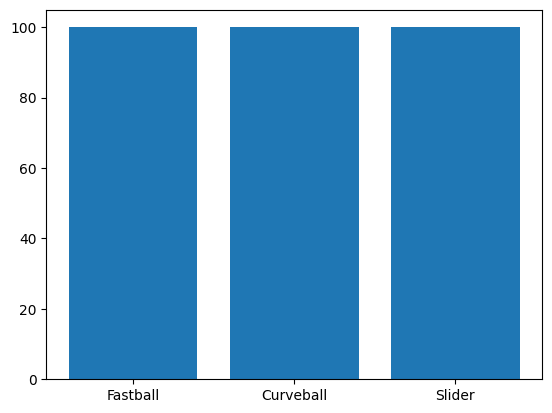

In [67]:
#creat a visualization of the mean of stuff+ for each pitch type 
plt.bar(['Fastball', 'Curveball', 'Slider', 'Changeup'], [dfb2['stuff+'].mean(), dcb2['stuff+'].mean(), dsl2['stuff+'].mean(), dch2['stuff+'].mean()])


In [68]:
#reccombine the dataframes
College_Final_Stuff = pd.concat([dfb2, dsl2, dcb2, dch2], ignore_index=True)

In [69]:
College_Final_Stuff

Pitcher              PitcherTeam TaggedPitchType       PitchCall  \
0      Graham Kasey       Normal cornbelters        Fastball  StrikeSwinging   
1     Wesley Culley  Lafayette aviators 2025        Fastball          InPlay   
2     Wesley Culley  Lafayette aviators 2025        Fastball          InPlay   
3      Graham Kasey       Normal cornbelters        Fastball          InPlay   
4      Graham Kasey       Normal cornbelters        Fastball          InPlay   
..              ...                      ...             ...             ...   
244   Reese Ellison     Burlington bees 2025        Changeup          InPlay   
245  Zach O'donnell       Normal cornbelters        Changeup      BallCalled   
246   Reese Ellison     Burlington bees 2019        Changeup          InPlay   
247   Reese Ellison     Burlington bees 2025        Changeup          InPlay   
248    Luka Zachman       Normal cornbelters        Changeup          InPlay   

            PlayResult   RelSpeed     SpinRate  RelHeight   RelSide  \
0    StrikeoutSwinging  88.026771  2044.868411   5.166763 -0.012053   
1                  Out  88.957994  2071.524087   5.636354  0.550873   
2                  Out  87.269391  2101.935211   5.602830  0.798402   
3                  Out  89.272617  2045.344980   5.154947 -2.207809   
4                  Out  90.588216  1979.606498   5.182451 -1.553652   
..                 ...        ...          ...        ...       ...   
244                Out  72.344271  1720.866000   4.848231 -0.435841   
245               Walk  76.833733  1302.209435   5.581688 -0.615709   
246                Out  75.650501  1328.196393   5.585244 -0.220473   
247                Out  73.156287  1758.893047   4.998045 -0.848446   
248             Single  80.979970  1529.894462   6.002749  2.678431   

     Extension  ...  PlateLocHeight  PlateLocSide  ABS_Horizontal  \
0          6.0  ...        3.663367      1.728037       10.335196   
1          6.0  ...        3.646876      0.165596       15.616015   
2          6.0  ...        2.982881      0.385065       14.369670   
3          6.0  ...        2.554941      0.523411       12.387914   
4          6.0  ...        3.305691      0.772293       11.286044   
..         ...  ...             ...           ...             ...   
244        6.0  ...        1.986395      0.285843       11.321148   
245        6.0  ...       -0.059285     -0.522022       16.023080   
246        6.0  ...        2.020428      1.395305       15.837357   
247        6.0  ...        2.866129      0.841641       12.819593   
248        6.0  ...        2.374182     -1.022320       12.131745   

     ABS_RelSide  differential_break  xWhiff_xg  xWhiff_rf  xWhiff_nn  \
0       0.012053            3.483405   0.682765       0.68   0.403088   
1       0.550873            1.094124   0.069136       0.05   0.343657   
2       0.798402            0.856462   0.011133       0.02   0.563895   
3       2.207809            2.174954   0.034194       0.04   0.247987   
4       1.553652            3.829572   0.059387       0.01   0.101341   
..           ...                 ...        ...        ...        ...   
244     0.435841            1.988191        NaN        NaN   0.000000   
245     0.615709            6.597164        NaN        NaN   0.000000   
246     0.220473            5.412713        NaN        NaN   0.000000   
247     0.848446            3.438216        NaN        NaN   0.000000   
248     2.678431            4.644413        NaN        NaN   0.000000   

       xWhiff      stuff+  
0    0.588618  254.332030  
1    0.154264   66.655091  
2    0.198343   85.700563  
3    0.107393   46.402946  
4    0.056909   24.589604  
..        ...         ...  
244  0.000000         NaN  
245  0.000000         NaN  
246  0.000000         NaN  
247  0.000000         NaN  
248  0.000000         NaN  

[249 rows x 22 columns]

In [70]:
College_Final_Stuff.to_csv('2025wStuff+.csv',index=False)